# I have tried to convert continuous data like age, weight, ap_hi, etc to categorized data but it did error 

In [114]:
import pandas as pd
import pprint as pp
import numpy as np
from math import log
from sklearn.model_selection import train_test_split
cardiac = pd.read_csv('cardio_train.csv',delimiter=";")
cardiac = cardiac.drop(['id'], axis=1)

In [115]:
cardiac.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# Viewing & Processing for continuous data [age, height, weight]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc60b93590>,
      dtype=object)

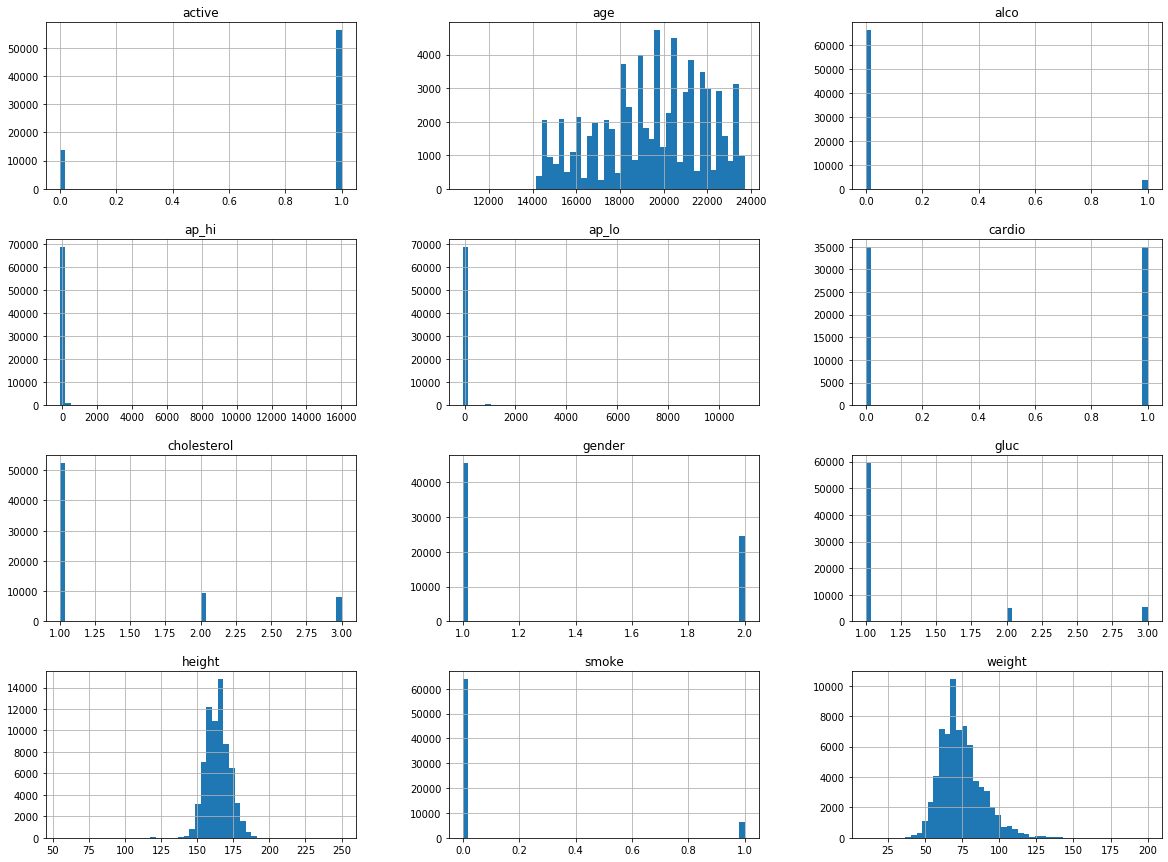

In [106]:
cardiac.hist(bins=50, figsize=(20, 15))

In [107]:
cardiac =cardiac.iloc[:10000]
cont = ['age','height','weight','ap_hi','ap_lo']

### making continuous data only 2 categories
# for x in cont:
#     avg =round(cardiac[x].mean())
#     cardiac[x] = np.where(cardiac[x]>=avg, 1, 0)


# Calculate attribute Entropy 

In [108]:
def entropy(attributeDictionary, totalNumber):
    attributeEntropy=0
    for x in  attributeDictionary:
        entropy =0
        sum_subAttr = sum(attributeDictionary[x])
        if sum_subAttr == 0:
            pass
        else:
            currentEntropy= 0
            for y in attributeDictionary[x]:
                if y == 0:
                    currentEntropy= 0
                else:    
                    currentEntropy = (-y/sum_subAttr)*log(y/sum_subAttr,2)
                entropy += currentEntropy
            entropy *= (sum_subAttr/totalNumber)
            attributeEntropy += entropy 
    return attributeEntropy

# Calculate All Attributes Entropy 

In [109]:
def attributes_entropy(dataFrame):
    final = dict()
    attributesList = dataFrame.columns[:-1].tolist()
    classes = dataFrame[dataFrame.columns[-1]].values.tolist()
    classes_set =set(dataFrame[dataFrame.columns[-1]].values.tolist())
    unique_values_per_attributes = dict()
    for colName in attributesList:
        unique_values_per_attributes[colName] = set(dataFrame[colName].values.tolist())
        unique_values_per_attributes[colName] = {x: np.zeros(len(classes_set)).tolist() for x in unique_values_per_attributes[colName]}
        for i in range(len(dataFrame[colName].values.tolist())):
            unique_values_per_attributes[colName][dataFrame[colName][i]][classes[i]] +=1
        attrEntropy =  entropy(unique_values_per_attributes[colName], len(classes))   
        final[colName] = attrEntropy
        
           
    #print(unique_values_per_attributes)  
    #print(unique_values_per_attributes)
    return final 

# Get Best Attribute 

In [110]:
def best_attr(df):
    all_attr =attributes_entropy(df) 
    return [min(all_attr, key=all_attr.get), all_attr[min(all_attr, key=all_attr.get)]]

# Get New table 

In [111]:
def get_new_df(df, col_name, val):
    return df[df[col_name] == val].reset_index(drop=True)

# Build Tree


In [112]:
def build_tree(df, tree= None):
    try:
        best = best_attr(df)
        unique_values = df[best[0]].unique()


        if tree is None:                    
            tree={}
            tree[best[0]] = {}

        for val in unique_values:
            new_df = get_new_df(df, best[0], val)
            class_val,impurity = np.unique(new_df[new_df.columns[-1]],return_counts=True) 
            if len(impurity) == 1:
                tree[best[0]][val]= class_val[0]
            else:
                tree[best[0]][val] = build_tree(new_df)
    except (e):
            print ("somethin went wrong: " , str(e))
        
       
    return tree

In [113]:
pp.pprint(build_tree(cardiac))

{'age': {10878: 0,
         14297: 1,
         14299: 0,
         14301: 0,
         14305: 0,
         14307: {'gender': {1: 1, 2: 0}},
         14309: 0,
         14319: 1,
         14321: 0,
         14324: 1,
         14325: 0,
         14327: 1,
         14328: 0,
         14333: 0,
         14343: 0,
         14344: 0,
         14347: 0,
         14350: 0,
         14352: 1,
         14356: 1,
         14357: {'height': {170: 0, 181: 1}},
         14359: 0,
         14362: {'height': {158: 1, 159: 0}},
         14365: 0,
         14366: 0,
         14367: 0,
         14368: 0,
         14369: {'gender': {1: 0, 2: 1}},
         14370: 0,
         14373: {'height': {168: 1, 169: 0}},
         14374: 0,
         14377: 1,
         14378: 0,
         14380: 0,
         14385: 0,
         14391: 0,
         14393: 0,
         14395: 0,
         14396: 0,
         14397: 0,
         14398: 0,
         14399: 0,
         14400: 0,
         14402: {'gender': {1: 0, 2: 1}},
         14404

         16040: 0,
         16041: 0,
         16042: 0,
         16043: 1,
         16044: {'gender': {1: 1, 2: 0}},
         16045: 0,
         16046: 1,
         16047: 1,
         16049: 0,
         16050: 0,
         16052: {'gender': {1: 0, 2: 1}},
         16053: 1,
         16055: {'height': {160: 0, 172: 1}},
         16056: {'gender': {1: 0, 2: 1}},
         16057: 1,
         16058: {'height': {158: 1, 159: 1, 168: 0, 173: 1}},
         16059: {'height': {158: 0, 168: 1, 170: 0, 181: 0}},
         16060: 0,
         16061: 1,
         16062: {'height': {165: 0, 167: 1}},
         16064: 1,
         16065: 1,
         16066: 1,
         16068: {'height': {159: 1, 168: 0, 174: 0}},
         16069: 0,
         16070: 1,
         16072: {'height': {145: 0, 160: 1, 162: 0, 198: 1}},
         16073: 0,
         16074: {'height': {160: 0, 169: 1, 173: 0, 176: 1}},
         16075: {'gender': {1: 1, 2: 0}},
         16076: 0,
         16078: 1,
         16079: {'height': {170: 0, 171

         18337: {'weight': {70.0: 0, 84.0: 0, 95.0: 1}},
         18338: {'height': {165: 0, 169: 1}},
         18340: 1,
         18341: {'height': {158: 1, 159: 0}},
         18343: 1,
         18344: {'height': {156: 0, 160: 0, 162: 1}},
         18345: 1,
         18346: 0,
         18347: 1,
         18348: {'gender': {1: 1, 2: 0}},
         18349: 0,
         18350: {'height': {150: 0, 151: 1, 168: 1, 177: 0}},
         18351: 0,
         18352: {'height': {156: 0, 159: 1, 165: 1}},
         18353: {'gender': {1: 0, 2: 1}},
         18354: {'gender': {1: 0, 2: 1}},
         18355: 0,
         18356: {'height': {156: 0, 164: 0, 165: 1, 166: 0, 168: 0, 169: 0}},
         18357: {'gender': {1: 0, 2: 1}},
         18358: 0,
         18359: {'height': {157: 0, 166: 1}},
         18360: 0,
         18361: 0,
         18362: 0,
         18363: {'gender': {1: 1, 2: 0}},
         18364: 1,
         18366: {'gender': {1: 1, 2: 0}},
         18367: 0,
         18368: 1,
         18369: 0,
 

         20034: 0,
         20043: 0,
         20057: 1,
         20116: 1,
         20124: 1,
         20139: 1,
         20143: 0,
         20144: 1,
         20155: 1,
         20158: 1,
         20159: 1,
         20160: 1,
         20161: 1,
         20164: 1,
         20170: 0,
         20171: 0,
         20172: 0,
         20174: 0,
         20176: 1,
         20178: 0,
         20179: 1,
         20180: {'gender': {1: 0, 2: 1}},
         20182: 0,
         20183: 1,
         20187: {'height': {165: 0, 167: 1, 174: 1}},
         20189: {'gender': {1: 0, 2: 1}},
         20190: {'weight': {75.0: 0, 86.0: 1, 88.0: 1}},
         20191: 1,
         20193: 1,
         20194: 0,
         20196: {'weight': {55.0: 0, 62.0: 1, 81.0: 1}},
         20197: 0,
         20198: 1,
         20200: 1,
         20201: {'height': {158: 1, 164: 0}},
         20203: 1,
         20205: 0,
         20207: 0,
         20210: 0,
         20211: 0,
         20212: {'gender': {1: 1, 2: 0}},
         20218

         21343: {'gender': {1: 1, 2: 0}},
         21345: {'height': {164: 1, 169: 0}},
         21346: 0,
         21347: {'height': {160: 0, 172: 1}},
         21348: 0,
         21350: 1,
         21352: {'height': {168: 1, 169: 0}},
         21354: 0,
         21355: 0,
         21356: {'height': {171: 0, 172: 1}},
         21357: 0,
         21360: 0,
         21361: 1,
         21362: 0,
         21363: {'height': {170: 1, 172: 0}},
         21364: {'gender': {1: 1, 2: 0}},
         21365: 1,
         21368: 1,
         21373: 1,
         21374: 0,
         21377: 0,
         21378: 1,
         21379: {'height': {165: 0, 170: 1}},
         21381: 1,
         21382: {'height': {163: 0, 170: 1}},
         21383: 0,
         21385: 0,
         21387: {'height': {168: 1, 172: 0}},
         21392: 0,
         21393: 0,
         21394: 1,
         21396: 0,
         21398: {'height': {153: 1, 160: 0, 170: 0, 175: 0}},
         21399: 0,
         21403: 1,
         21405: 0,
         21

         22427: {'gender': {1: 1, 2: 0}},
         22428: 1,
         22429: 0,
         22431: 1,
         22432: {'gender': {1: 1, 2: 0}},
         22434: 1,
         22435: 1,
         22437: 0,
         22438: 1,
         22440: 1,
         22442: 1,
         22443: 0,
         22444: 1,
         22445: 1,
         22446: 1,
         22448: 1,
         22450: 1,
         22451: 0,
         22452: 1,
         22454: {'height': {160: 1, 168: 0}},
         22456: 1,
         22457: 1,
         22458: 0,
         22461: 1,
         22462: 1,
         22463: 0,
         22464: {'gender': {1: 0, 2: 1}},
         22465: 1,
         22466: {'height': {165: 0, 174: 1}},
         22467: 1,
         22469: {'weight': {69.0: 0, 72.0: 1}},
         22471: 1,
         22472: 1,
         22474: 1,
         22475: {'weight': {60.0: 1, 85.0: 1, 87.0: 0}},
         22476: 1,
         22477: {'height': {158: 1, 163: 1, 169: 0}},
         22478: 1,
         22479: 1,
         22482: {'height': {120: 1

         23586: 0,
         23587: 1,
         23589: 1,
         23590: 1,
         23591: 1,
         23593: 0,
         23602: 1,
         23604: 1,
         23606: 0,
         23613: 1,
         23614: 1,
         23616: 1,
         23617: 1,
         23620: 1,
         23633: 0,
         23636: 0,
         23638: 1,
         23643: 0,
         23645: 1,
         23646: 0,
         23648: 1,
         23653: 0,
         23655: 1,
         23661: 0,
         23666: 0,
         23670: 0}}
